### Edge Detection

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

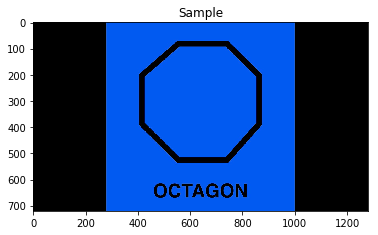

In [2]:
img = cv2.imread('sample5.jpg')
plt.imshow(img)
plt.title('Sample')
plt.show()

In [3]:
blur = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

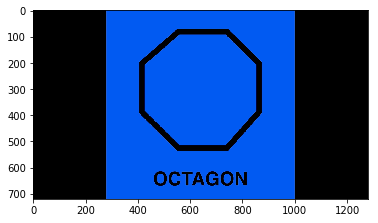

In [4]:
plt.imshow(blur,cmap='gray')

In [5]:
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

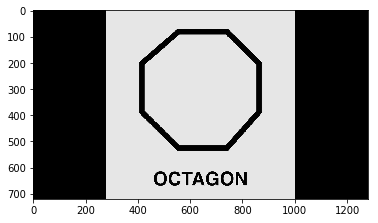

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
print(gray.shape)

(720, 1280)


In [8]:
def pad(img,shp):
    p=np.zeros((shp[0]+2,shp[1]+2))
    p[1:-1,1:-1]=np.copy(img)
    p[0,1:-1],p[-1,1:-1]=img[0],img[-1]
    p[1:-1,0],p[1:-1,-1]=img[:,0],img[:,-1]
    p[0,0],p[0,-1]=img[0,0],img[0,-1]
    p[-1,0],p[-1,-1]=img[-1,0],img[-1,-1]
    return p

In [9]:
def sobel_filter(img):
    sabel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sabel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    shp = img.shape
    shpm=(3,3)
    padded_img=pad(img,shp)
    grad_matrix=np.zeros(shp)
    out=np.zeros(shp)
    exp = np.zeros(shp)
    for i in range(shp[0]):
        for j in range(shp[1]):
            g_x=np.multiply(padded_img[i:i+shpm[0],j:j+shpm[1]],sabel_x).sum()
            g_y=np.multiply(padded_img[i:i+shpm[0],j:j+shpm[1]],sabel_y).sum()
            if g_y!=0 or g_x!=0:
                if g_x==0:
                    rad=np.arctan2(g_y,g_x)
                else:
                    rad=np.arctan2(g_y,g_x)
                deg=rad*(180/np.pi)
                rad_rev = deg*(np.pi/180)
                #print(rad*(180/np.pi),end=" ")
                #print(rad_rev)
                grad_matrix[i][j]=deg
                if grad_matrix[i][j]<0:
                    exp[i][j] = grad_matrix[i][j]
                out[i][j] = np.sqrt(np.square(g_x)+np.square(g_y))
            else:
                out[i,j]=255
                grad_matrix[i][j]=255
    out=np.array(out, dtype = np.uint8)
    grad_matrix=np.array(grad_matrix,dtype= np.uint8)
    
    return out,grad_matrix,exp

In [10]:
def prewitt_filter(img):
    prewitt_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    prewitt_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    shp = img.shape
    shpm=(3,3)
    padded_img=pad(img,shp)
    grad_matrix=np.zeros(shp)
    out=np.zeros(shp)
    exp = np.zeros(shp)
    for i in range(shp[0]):
        for j in range(shp[1]):
            g_x=np.multiply(padded_img[i:i+shpm[0],j:j+shpm[1]],prewitt_x).sum()
            g_y=np.multiply(padded_img[i:i+shpm[0],j:j+shpm[1]],prewitt_y).sum()
            if g_y!=0 or g_x!=0:
                if g_x==0:
                    rad=np.arctan2(g_y,g_x)
                else:
                    rad=np.arctan2(g_y,g_x)
                deg=rad*(180/np.pi)
                rad_rev = deg*(np.pi/180)
                #print(rad*(180/np.pi),end=" ")
                #print(rad_rev)
                grad_matrix[i][j]=deg   
                if grad_matrix[i][j]<0:
                    exp[i][j] = grad_matrix[i][j]
                    print(exp[i][j])
                out[i][j] = np.sqrt(np.square(g_x)+np.square(g_y))
            else:
                out[i,j]=255
                grad_matrix[i][j]=255
    out=np.array(out, dtype = np.uint8)
    
    return out,grad_matrix,exp

In [11]:
output, grad_matrix,exp = sobel_filter(gray)

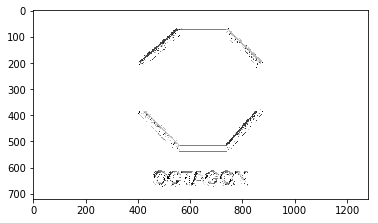

In [12]:
plt.imshow(exp,cmap='gray')

In [13]:
output2, grad_matrix2,exp2 = prewitt_filter(gray)

-45.0
-63.43494882292201
-116.56505117707799
-135.0
-45.0
-63.43494882292201
-90.0
-116.56505117707799
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90

-116.56505117707799
-18.43494882292201
-45.0
-135.0
-116.56505117707799
-90.0
-63.43494882292201
-45.0
-26.56505117707799
-90.0
-116.56505117707799
-41.18592516570965
-41.423665625002656
-45.0
-48.51498049656796
-52.563495897067185
-44.67259910915561
-42.87890360333855
-136.0139787227853
-133.86182299251183
-132.45788215741536
-133.98060971854494
-136.78991060824606
-135.0
-78.69006752597979
-116.56505117707799
-149.03624346792648
-135.0
-45.0
-45.0
-60.25511870305778
-90.0
-153.434948822922
-63.43494882292201
-26.56505117707799
-78.69006752597979
-66.03751102542182
-48.179830119864235
-45.23972989608085
-47.321530589832726
-53.83659113240844
-46.28939790406027
-38.25442035251718
-26.56505117707799
-63.43494882292201
-135.81457704975972
-133.95361809290185
-132.96739122335345
-134.60756929065914
-133.31531568210372
-126.86989764584402
-101.30993247402021
-135.0
-120.96375653207352
-123.69006752597979
-135.0
-116.56505117707799
-90.0
-90.0
-135.0
-135.0
-90.0
-45.0
-52.1250163489018
-16

-134.0491200140635
-134.55585556688808
-134.23610153907
-129.8055710922652
-135.0
-111.80140948635182
-123.69006752597979
-45.0
-123.69006752597979
-161.565051177078
-90.0
-45.0
-71.56505117707799
-90.0
-63.43494882292201
-90.0
-116.56505117707799
-90.0
-135.0
-26.56505117707799
-135.0
-135.0
-90.0
-36.86989764584402
-135.0
-90.0
-45.0
-45.0
-90.0
-63.43494882292201
-63.43494882292201
-53.13010235415598
-40.60129464500447
-50.906141113770495
-46.8307486480255
-46.7117781790526
-50.129712316830926
-46.87174496528875
-42.13759477388825
-71.56505117707799
-90.0
-45.0
-135.0
-135.0
-135.0
-134.49594456268196
-134.0491200140635
-134.85194921965567
-136.1381770074882
-138.01278750418336
-90.0
-123.69006752597979
-135.0
-90.0
-153.434948822922
-161.565051177078
-135.0
-135.0
-135.0
-135.0
-135.0
-90.0
-45.0
-90.0
-135.0
-135.0
-45.0
-153.434948822922
-116.56505117707799
-45.0
-90.0
-23.962488974578186
-46.27303002005671
-47.918434720781555
-49.14825465234868
-50.65087273019939
-46.61353893288

-37.568592028827496
-45.0
-45.0
-135.0
-135.0
-147.52880770915152
-135.23578376987663
-133.51213247117224
-132.92408953995886
-133.6881122174959
-127.87498365109822
-122.47119229084849
-116.56505117707799
-45.0
-71.56505117707799
-90.0
-135.0
-153.434948822922
-161.565051177078
-153.434948822922
-135.0
-116.56505117707799
-90.0
-45.0
-45.0
-116.56505117707799
-135.0
-45.0
-135.0
-71.56505117707799
-135.0
-63.43494882292201
-26.56505117707799
-18.43494882292201
-18.43494882292201
-45.0
-38.65980825409009
-46.185260818622396
-48.85680098558985
-54.327054177185836
-49.246842607023474
-45.8998597149044
-33.690067525979785
-45.0
-45.0
-135.0
-135.0
-139.39870535499554
-134.26860424690247
-133.24914581345718
-132.9416296428067
-133.08375562750362
-127.74680538727468
-123.69006752597979
-126.86989764584402
-18.43494882292201
-146.30993247402023
-153.434948822922
-135.0
-135.0
-45.0
-45.0
-116.56505117707799
-111.80140948635182
-153.434948822922
-161.565051177078
-135.0
-45.0
-90.0
-90.0
-45.0

-56.309932474020215
-63.43494882292201
-135.0
-18.43494882292201
-45.0
-45.0
-75.96375653207353
-104.03624346792648
-45.0
-43.36342295838329
-45.94695144677347
-48.144957464698024
-52.48329690782255
-47.67186459327259
-39.427802196036204
-45.0
-108.43494882292202
-45.0
-136.12330271407544
-134.15994613030335
-133.22119968432617
-134.7106298365594
-135.71615994547042
-137.72631099390625
-135.0
-71.56505117707799
-123.69006752597979
-135.0
-116.56505117707799
-130.6012946450045
-135.0
-45.0
-56.309932474020215
-45.0
-26.56505117707799
-45.0
-56.309932474020215
-66.80140948635182
-50.527540151656176
-48.144957464698024
-49.43544518933999
-50.17216082509655
-47.62240146054109
-38.927543592792304
-45.0
-135.61605990839925
-133.79576157117006
-133.7060648346471
-134.7163598442422
-135.0
-137.72631099390625
-78.69006752597979
-116.56505117707799
-135.0
-90.0
-45.0
-135.0
-135.0
-45.0
-37.874983651098205
-26.56505117707799
-45.0
-63.43494882292201
-90.0
-90.0
-33.690067525979785
-56.3099324740

-63.43494882292201
-45.0
-71.56505117707799
-135.0
-161.565051177078
-153.434948822922
-45.0
-56.309932474020215
-78.69006752597979
-45.0
-71.56505117707799
-56.309932474020215
-51.70983680775693
-46.39718102729638
-47.630996830196715
-51.682016572257865
-46.537772384697455
-43.40885972880541
-153.434948822922
-45.0
-135.0
-123.69006752597979
-135.75716886505853
-132.80236896258353
-131.2502482141995
-134.0088224249892
-139.39870535499554
-144.46232220802563
-74.05460409907715
-119.74488129694222
-135.0
-116.56505117707799
-135.0
-153.434948822922
-161.565051177078
-26.56505117707799
-18.43494882292201
-45.0
-135.0
-90.0
-90.0
-135.0
-135.0
-45.0
-135.0
-26.56505117707799
-45.0
-33.690067525979785
-45.0
-63.43494882292201
-78.69006752597979
-63.43494882292201
-47.72631099390627
-48.70462744207712
-50.60398544253643
-50.674610864955774
-47.395005516872345
-34.2157021324374
-135.0
-135.0
-133.865578369023
-133.92917554521304
-133.9235880026128
-133.48258587498788
-128.48019824834302
-106

-179.84259440832676
-179.60211903816543
-177.13759477388825
-26.56505117707799
-45.0
-45.0
-45.0
-70.01689347810003
-59.53445508054013
-47.81555668421123
-48.11698859912017
-52.99747347180383
-49.13085623327642
-42.075022050843636
-45.0
-45.0
-135.0
-135.98776039963982
-135.16049195983464
-134.2868113649824
-134.06591244603084
-132.58049078334366
-131.18592516570965
-122.0053832080835
-123.69006752597979
-18.43494882292201
-36.86989764584402
-35.53767779197438
-53.97262661489639
-54.78240703180729
-46.35746584453061
-47.828784892267656
-52.154519837289534
-47.80980813607028
-45.0
-45.0
-45.0
-135.0
-134.35261761305813
-133.68992986166487
-133.9132185470018
-134.6154703404155
-138.57633437499737
-147.9946167919165
-90.0
-146.30993247402023
-135.0
-135.0
-5.710593137499642
-179.74870433279105
-179.84259440832676
-45.0
-50.19442890773481
-45.0
-30.46554491945988
-44.05304855322654
-47.82396028924236
-52.54652262443571
-45.795723552739275
-41.423665625002656
-45.0
-45.0
-45.0
-135.0
-132.8

-71.56505117707799
-63.43494882292201
-26.56505117707799
-18.43494882292201
-135.0
-63.43494882292201
-33.690067525979785
-63.43494882292201
-18.43494882292201
-36.02737338510361
-45.0
-43.745548377318464
-41.1700140915524
-43.84654954889463
-45.0
-45.0
-135.0
-135.0
-134.71494872241618
-135.265256343376
-134.64115847365127
-135.0
-136.8476102659946
-141.34019174590992
-161.565051177078
-153.434948822922
-135.0
-153.434948822922
-135.0
-135.0
-135.0
-135.0
-45.0
-63.43494882292201
-135.0
-45.0
-68.19859051364818
-90.0
-45.0
-32.47119229084849
-42.436229788535
-42.018538780017806
-38.58121326976122
-43.549783709066574
-48.46822925891715
-45.0
-135.0
-135.0
-135.28224293627088
-135.0
-133.9235880026128
-134.61287224584905
-133.31531568210372
-135.0
-90.0
-116.56505117707799
-135.0
-135.0
-135.0
-90.0
-135.0
-135.0
-140.19442890773482
-90.0
-90.0
-45.0
-36.86989764584402
-135.0
-90.0
-45.0
-63.43494882292201
-39.80557109226519
-63.43494882292201
-126.86989764584402
-45.0
-41.1120904391669

-135.0
-135.0
-135.0
-135.0
-135.40066325579215
-135.1495969956025
-134.52254622269044
-134.83295738431912
-135.0
-135.0
-149.03624346792648
-116.56505117707799
-116.56505117707799
-135.0
-135.0
-135.0
-135.0
-45.0
-45.0
-26.56505117707799
-26.56505117707799
-45.0
-26.56505117707799
-45.0
-63.43494882292201
-23.19859051364819
-37.568592028827496
-45.65854317756361
-43.9139541739936
-40.69296781399768
-43.80651057601796
-47.60256220249981
-26.56505117707799
-135.0
-135.0
-135.0
-135.0
-135.0
-134.8496177219284
-134.52254622269044
-134.8339257418689
-135.0
-138.3664606634298
-143.13010235415598
-90.0
-135.0
-135.0
-135.0
-135.0
-135.0
-161.565051177078
-153.434948822922
-135.0
-33.690067525979785
-116.56505117707799
-71.56505117707799
-135.0
-116.56505117707799
-18.43494882292201
-63.43494882292201
-90.0
-45.0
-45.0
-36.86989764584402
-63.43494882292201
-41.98721249581666
-41.719119227390586
-43.14318115492797
-40.91438322002513
-43.87669728592458
-42.27368900609374
-45.0
-45.0
-135.0
-1

-137.29061004263855
-135.1773857475323
-134.183211227653
-134.7271650169319
-135.0
-135.0
-161.565051177078
-135.0
-135.0
-116.56505117707799
-63.43494882292201
-63.43494882292201
-90.0
-90.0
-135.0
-90.0
-90.0
-45.0
-45.0
-39.80557109226519
-39.80557109226519
-41.82016988013577
-38.03563925214521
-42.63145171227465
-46.12330271407543
-161.565051177078
-45.0
-45.0
-90.0
-138.91824886406738
-134.819256815591
-134.06844340192254
-134.72973889350587
-134.06080905426444
-127.87498365109822
-135.0
-116.56505117707799
-135.0
-153.434948822922
-135.0
-135.0
-135.0
-128.6598082540901
-63.43494882292201
-108.43494882292202
-45.0
-90.0
-75.96375653207353
-161.565051177078
-45.0
-45.0
-45.0
-45.0
-38.65980825409009
-42.54914736222897
-39.26567207532732
-41.23766727642984
-44.377244312793685
-45.0
-135.0
-134.81694701415654
-134.5322897399615
-134.73100770630353
-133.76802259736027
-116.56505117707799
-128.6598082540901
-123.69006752597979
-135.0
-90.0
-90.0
-90.0
-153.434948822922
-153.4349488229

-135.0
-135.0
-132.27368900609375
-134.59075139196506
-134.40689717414116
-135.0
-135.26899229369647
-132.27368900609375
-116.56505117707799
-116.56505117707799
-116.56505117707799
-146.30993247402023
-135.0
-135.0
-135.0
-135.0
-71.56505117707799
-26.56505117707799
-56.309932474020215
-135.0
-108.43494882292202
-135.0
-63.43494882292201
-18.43494882292201
-45.0
-18.43494882292201
-14.036243467926479
-14.036243467926479
-45.0
-11.309932474020213
-45.0
-39.80557109226519
-41.56636963754948
-37.71242190658444
-41.6335393365702
-44.13194855025446
-45.0
-45.0
-45.0
-135.0
-135.0
-135.0
-135.20536033749488
-134.40443122739416
-134.620563298581
-134.46454101443547
-135.0
-135.0
-108.43494882292202
-135.0
-123.69006752597979
-90.0
-135.0
-90.0
-90.0
-45.0
-90.0
-135.0
-135.0
-135.0
-135.0
-45.0
-26.56505117707799
-26.56505117707799
-135.0
-45.0
-135.0
-135.0
-90.0
-45.0
-45.0
-45.0
-14.036243467926479
-14.036243467926479
-45.0
-23.962488974578186
-34.99202019855866
-41.735716275981474
-38.713

-158.19859051364818
-108.43494882292202
-126.86989764584402
-116.56505117707799
-135.0
-116.56505117707799
-90.0
-90.0
-63.43494882292201
-90.0
-135.0
-135.0
-45.0
-90.0
-63.43494882292201
-135.0
-135.0
-18.43494882292201
-135.0
-135.0
-63.43494882292201
-26.56505117707799
-45.0
-39.80557109226519
-29.357753542791276
-42.5940294833547
-41.70716059963512
-38.269516065384344
-43.59425073895367
-49.76364169072618
-45.0
-45.0
-135.0
-135.0
-146.30993247402023
-135.0
-135.0
-134.14124106363647
-134.1662325448636
-135.0
-136.8476102659946
-126.86989764584402
-108.43494882292202
-116.56505117707799
-135.0
-135.0
-135.0
-135.0
-135.0
-135.0
-119.74488129694222
-135.0
-45.0
-90.0
-135.0
-90.0
-45.0
-38.65980825409009
-33.690067525979785
-41.78451600825179
-41.275942027251716
-37.27220194949841
-41.29306000628089
-43.75463573323166
-45.0
-45.0
-135.0
-135.0
-135.0
-135.0
-135.0
-135.2438103561041
-134.38127913212318
-134.76225954070702
-134.54886145321274
-131.18592516570965
-126.86989764584402


-135.0
-45.0
-38.65980825409009
-45.0
-90.0
-90.0
-18.43494882292201
-26.56505117707799
-21.80140948635181
-19.98310652189998
-44.59365376669096
-43.40483360418882
-39.80557109226519
-43.35297133874126
-46.12330271407543
-45.0
-45.0
-135.0
-134.30130561701654
-135.0
-134.05304855322655
-134.11313926252836
-133.75463573323165
-135.0
-147.9946167919165
-135.0
-135.0
-45.0
-50.19442890773481
-45.0
-90.0
-90.0
-45.0
-53.13010235415598
-81.86989764584403
-23.962488974578186
-42.954591511112774
-41.872193878713844
-38.53254107220849
-42.777696767528894
-46.59114027119459
-45.0
-45.0
-135.0
-135.0
-134.29268063145577
-135.0
-134.52844044592385
-134.46454101443547
-136.80873932249207
-151.69924423399362
-153.434948822922
-26.56505117707799
-18.43494882292201
-135.0
-143.13010235415598
-45.0
-36.86989764584402
-45.0
-90.0
-90.0
-45.0
-36.86989764584402
-75.96375653207353
-53.13010235415598
-42.978635059643985
-42.145975025329605
-38.10257244224825
-42.020169512321715
-45.59065721464667
-45.0
-4

-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-101.30993247402021
-104.03624346792648
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-108.43494882292202
-108.43494882292202
-51.34019174590991
-26.56505117707799
-26.56505117707799
-56.309932474020215
-40.60129464500447
-34.69515353123397
-46.005086005254185
-43.214378961223574
-40.25603405695954
-44.59933674420785
-52.30575953331083
-45.0
-63.43494882292201
-45.0
-135.0
-135.0
-135.0
-135.0
-134.50178838738637
-134.67629847507976
-134.88038476769597
-134.68861295972516
-135.40634623330902
-132.27368900609375
-135.0
-90.0
-135.0
-153.434948822922
-135.0
-45.0
-45.0
-116.56505117707799
-153.434948822922
-135.0
-153.434948822922
-11.309932474020213
-45.0
-38.65980825409009
-43.86182299251182
-42.975234918438964
-40.04047606556049
-43.891187872240074
-47.04540848888723
-26.56505117707799
-135.0
-135.0
-90.0
-116.56505117707799
-133.02506598911802
-134.19759056536103
-134.52452726755214
-135.0
-135.0
-126.86989764584402
-108.4

-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-108.43494882292202
-108.43494882292202
-116.56505117707799
-135.0
-45.0
-39.80557109226519
-36.86989764584402
-101.30993247402021
-116.565051

-18.43494882292201
-63.43494882292201
-90.0
-116.56505117707799
-135.0
-45.0
-68.19859051364818
-98.13010235415598
-108.43494882292202
-90.0
-80.53767779197439
-99.46232220802563
-116.56505117707799
-135.0
-135.0
-45.0
-63.43494882292201
-63.43494882292201
-60.25511870305778
-73.30075576600639
-95.71059313749964
-146.30993247402023
-63.43494882292201
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-116.56505117707799
-135.0
-45.0
-90.0
-45.0
-90.0
-66.80140948635182
-74.74488129694222
-90.0
-95.71059313749964
-105.94539590092286
-90.0
-90.0
-111.80140948635182
-71.56505117707799
-45.0
-56.309932474020215
-75.96375653207353
-90.0
-90.0
-96.3401917459099
-123.69006752597979
-135.0
-36.86989764584402
-51.34019174590991
-82.8749836510982
-79.69515353123397
-99.46232220802563
-149.03624346792648
-33.690067525979785
-111.80140948635182
-108.43494882292202
-96.3401917459099
-90.0
-161.565051177078
-18.43494882292201
-71.56505117707799
-71.56505117707799
-66.03751102542182
-73.30075576600639
-84.805571092

-127.76016260337796
-130.27986306895644
-105.25511870305779
-123.69006752597979
-126.86989764584402
-153.434948822922
-71.56505117707799
-53.97262661489639
-59.53445508054013
-46.56506908559226
-54.51253760227899
-69.4629268921447
-75.85052391365481
-78.86233333135523
-80.571223326498
-82.52844082340762
-88.45878135627612
-97.76516601842535
-98.94945808420889
-97.94347181059041
-98.17619709844554
-102.67316967007474
-111.8895567699047
-123.75012597307445
-131.58905504464428
-156.80140948635182
-161.565051177078
-135.0
-56.309932474020215
-56.309932474020215
-90.0
-137.72631099390625
-33.690067525979785
-158.6293777306568
-139.78088387483197
-117.18111108547723
-90.94695144677347
-90.15654545612048
-90.0
-90.0
-90.15783921370189
-90.0
-89.84128633528154
-90.0
-90.0
-90.0
-90.0
-89.21731945940704
-90.0
-109.48867299944119
-138.46822925891715
-149.03624346792648
-31.17134902771985
-47.97023060719652
-82.1295800764621
-90.94956685643582
-90.47613125164185
-89.84172476858588
-90.0
-90.0
-90

-161.565051177078
-16.69924423399362
-7.125016348901798
-39.52263127117112
-19.767168676791652
-20.664600943256307
-46.97493401088198
-45.0
-135.0
-146.30993247402023
-130.48601154199872
-158.3364033074424
-159.5793141156962
-139.23639479905884
-156.80140948635182
-116.56505117707799
-170.53767779197437
-90.0
-135.0
-22.380135051959574
-90.0
-90.0
-18.43494882292201
-14.036243467926479
-33.690067525979785
-24.68717372979263
-17.01143921636744
-37.874983651098205
-153.434948822922
-90.0
-135.0
-99.46232220802563
-159.70823233200596
-163.64581651399993
-142.0626026704158
-118.81079374297306
-112.38013505195958
-116.56505117707799
-94.39870535499554
-78.69006752597979
-18.43494882292201
-45.0
-22.619864948040426
-138.3664606634298
-1.507435758774968
-161.565051177078
-153.434948822922
-21.80140948635181
-45.0
-18.43494882292201
-28.562931033554666
-13.489892137018202
-50.11731484997264
-169.78039390402097
-166.9170093251889
-165.96375653207352
-168.6900675259798
-26.56505117707799
-165.96

-11.309932474020213
-6.34019174590991
-167.90524292298792
-63.43494882292201
-71.56505117707799
-14.931417178137554
-168.6900675259798
-135.0
-135.0
-63.43494882292201
-30.96375653207352
-30.96375653207352
-13.766300685466259
-6.700753773667982
-12.819094165243769
-135.0
-116.56505117707799
-90.0
-90.0
-71.56505117707799
-71.56505117707799
-90.0
-26.56505117707799
-26.56505117707799
-90.0
-153.434948822922
-179.67991517621834
-176.18592516570965
-135.0
-0.1582752314141257
-0.7440592028887094
-170.53767779197437
-168.6900675259798
-11.309932474020213
-9.462322208025617
-30.43423575344341
-14.774550275046582
-24.341089936692512
-148.95829007451138
-168.53711599525036
-163.05467662262086
-161.565051177078
-143.13010235415598
-63.43494882292201
-146.30993247402023
-45.0
-156.03751102542182
-45.0
-45.0
-135.0
-153.434948822922
-63.43494882292201
-16.69924423399362
-22.619864948040426
-6.993345386806125
-9.293308599397115
-125.53767779197437
-45.0
-63.43494882292201
-116.56505117707799
-135.

-26.56505117707799
-11.309932474020213
-116.56505117707799
-153.434948822922
-26.56505117707799
-4.085616779974877
-1.0184843477131498
-0.7913278506102571
-1.558684206210823
-174.28940686250036
-173.99099404250546
-45.0
-45.0
-138.81407483429035
-155.69066851393308
-147.86710414001908
-141.74557964748283
-164.05460409907712
-35.53767779197438
-83.6598082540901
-176.22180229283842
-179.78214637490285
-153.434948822922
-4.763641690726178
-0.46205272143076487
-178.5436413656603
-178.9334464625271
-176.03968816954162
-174.28940686250036
-161.565051177078
-45.0
-63.43494882292201
-45.0
-153.434948822922
-63.43494882292201
-19.98310652189998
-9.35297925009325
-1.9854585845169266
-2.2025981617658053
-3.576334374997351
-177.8321097207789
-178.19126067750796
-167.19573393471325
-135.0
-90.0
-14.036243467926479
-135.0
-153.434948822922
-24.443954780416536
-3.8140748342903543
-14.931417178137554
-10.332700515921784
-34.38034472384487
-71.56505117707799
-143.13010235415598
-125.09581678702612
-168

-135.0
-116.56505117707799
-5.194428907734806
-0.15319690634815616
-0.2301022950972138
-176.63353933657018
-90.0
-168.6900675259798
-128.99099404250546
-170.98929045318238
-172.12433827223634
-154.23067237566127
-138.01278750418336
-68.19859051364818
-63.43494882292201
-48.81407483429036
-20.854458039578347
-7.49585763972986
-7.212058863805513
-49.573921259900864
-14.036243467926479
-145.30484646876604
-172.67359333983046
-170.53767779197437
-157.83365417791757
-174.28940686250036
-36.86989764584402
-9.462322208025617
-90.0
-123.69006752597979
-54.46232220802562
-179.84430533020225
-179.68169338854864
-175.6012946450045
-90.0
-23.19859051364819
-135.0
-90.0
-26.56505117707799
-57.9946167919165
-169.3678565419343
-171.50869972305355
-153.1721259896855
-169.38034472384487
-90.0
-95.1944289077348
-135.0
-63.43494882292201
-157.16634582208246
-128.6598082540901
-85.42607874009914
-91.33221985386963
-90.0
-90.0
-88.63607246839707
-90.0
-92.86240522611175
-88.60281897270363
-69.8293465881496

-53.13010235415598
-90.0
-45.0
-45.0
-26.56505117707799
-28.072486935852957
-43.15238973400541
-21.37772828189674
-18.43494882292201
-43.33166255170669
-153.434948822922
-135.0
-141.79594401601895
-163.1462784387422
-155.67703160283546
-145.22216863363613
-149.03624346792648
-116.56505117707799
-116.56505117707799
-146.30993247402023
-143.13010235415598
-63.43494882292201
-90.0
-143.13010235415598
-51.34019174590991
-90.0
-71.56505117707799
-41.09145570554055
-20.398909433878195
-20.490837607926686
-39.936383146969916
-45.0
-153.434948822922
-9.462322208025617
-179.3904934233248
-153.434948822922
-3.1798301198642345
-0.1897204308253164
-45.0
-116.56505117707799
-26.56505117707799
-45.0
-71.56505117707799
-60.94539590092286
-47.60256220249981
-64.35899417569472
-88.42756957232665
-89.5541274480675
-90.44761417086056
-90.22468817962451
-90.0
-89.7753118203755
-89.54886145321272
-89.77353564765882
-90.0
-90.22646435234118
-90.22557276963406
-90.22468817962451
-89.77442723036594
-89.547078

-33.690067525979785
-71.56505117707799
-123.69006752597979
-135.0
-75.96375653207353
-23.962488974578186
-43.28164199834454
-43.590321256790354
-41.23287608077805
-46.73570458892839
-83.6598082540901
-26.56505117707799
-45.0
-45.0
-33.690067525979785
-161.565051177078
-33.690067525979785
-18.43494882292201
-18.71173787509977
-12.392023058211645
-31.58129191893125
-146.15994386503274
-168.84755965135233
-164.21924669048462
-150.94539590092285
-139.39870535499554
-108.43494882292202
-137.5448043798131
-135.1741507692066
-137.0157895227204
-134.85271040282484
-132.70938995736148
-148.39249775375112
-158.19859051364818
-26.56505117707799
-90.0
-111.80140948635182
-146.30993247402023
-135.0
-33.690067525979785
-75.96375653207353
-50.19442890773481
-21.80140948635181
-48.42387124493068
-43.653871715886964
-70.64100582430528
-132.31401920556607
-148.50519583719418
-127.56859202882748
-170.53767779197437
-3.3664606634298013
-0.2448522680443433
-0.1587136647184726
-172.8749836510982
-90.0
-26.5

-54.064189908125144
-65.37643521383639
-69.04422326936782
-62.487997376148556
-51.88825827699469
-50.527540151656176
-26.56505117707799
-14.036243467926479
-179.03982543333365
-177.8875887297709
-129.28940686250036
-121.75948008481281
-104.74356283647074
-93.81407483429037
-90.0
-90.0
-56.309932474020215
-7.997473471803832
-1.231977402639728
-1.650039395577879
-68.19859051364818
-90.0
-153.434948822922
-129.20720350496785
-155.52628118095535
-152.64471232049283
-136.6135389328812
-113.19859051364818
-92.6025622024998
-85.60129464500447
-90.0
-92.12109639666146
-100.88552705465874
-95.1944289077348
-61.189206257026946
-9.727578551401603
-1.0809241866606887
-0.658543177563603
-123.69006752597979
-135.0
-149.03624346792648
-150.25511870305778
-128.6598082540901
-115.16543275753766
-108.28134120297264
-106.99082329198617
-105.67651836334568
-108.12186024790135
-120.04991362098745
-125.72739822279969
-111.37062226934319
-106.38954033403479
-102.0947570770121
-94.08561677997488
-82.405356631

-135.0
-45.0
-128.6598082540901
-12.528807709151511
-90.0
-146.30993247402023
-45.0
-135.0
-95.71059313749964
-77.0053832080835
-50.19442890773481
-26.56505117707799
-135.0
-135.0
-63.43494882292201
-33.690067525979785
-135.0
-158.19859051364818
-135.0
-45.0
-45.0
-153.434948822922
-116.56505117707799
-165.96375653207352
-45.0
-135.0
-90.0
-116.56505117707799
-135.0
-116.56505117707799
-59.03624346792648
-9.462322208025617
-144.78240703180728
-120.17352002964432
-103.46520809481171
-91.39718102729638
-92.0700306530411
-91.41442321140215
-86.37851529588266
-77.30041551040264
-64.35899417569472
-45.0
-45.0
-141.34019174590992
-73.30075576600639
-78.69006752597979
-104.03624346792648
-53.13010235415598
-90.0
-146.30993247402023
-165.96375653207352
-98.13010235415598
-149.03624346792648
-55.00797980144134
-90.0
-90.0
-116.56505117707799
-26.56505117707799
-26.56505117707799
-146.30993247402023
-114.62356478616361
-106.574007756909
-97.56142842766695
-92.2196555531979
-90.42757250683341
-90

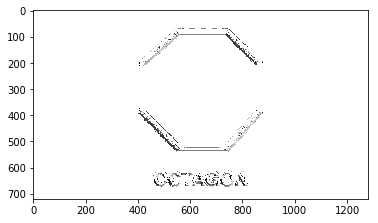

In [14]:
plt.imshow(exp2,cmap='gray')

In [15]:
output

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [16]:
output2

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [17]:
grad_matrix.shape[0]

720

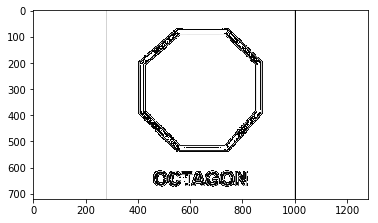

In [18]:
plt.imshow(output,cmap='gray')

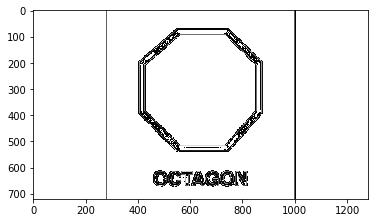

In [19]:
plt.imshow(output2,cmap='gray')

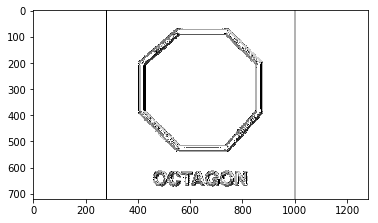

In [20]:
plt.imshow(grad_matrix,cmap='gray')

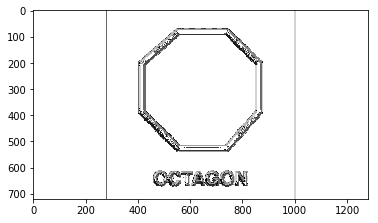

In [21]:
plt.imshow(grad_matrix2,cmap='gray')

In [22]:
def threshold(grad_matrix,angle_min,angle_max):
    
    output = np.zeros(grad_matrix.shape)
    for i in range(grad_matrix.shape[0]):
        for j in range(grad_matrix.shape[1]):
            
            if grad_matrix[i][j]<=angle_max and grad_matrix[i][j]>=angle_min:
                output[i][j] = 255
                print(grad_matrix[i][j])
            else:
                output[i][j] = 0
    return output

In [23]:
filtered = threshold(grad_matrix,30,60)

45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
54
30
45
30
45
45
45
45
45
45
45
45
45
45
45
45
30
45
45
45
45
45
45
45
37
45
45
45
45
45
45
45
45
45
45
45
45
54
45
45
45
45
56
45
45
45
45
45
45
50
45
45
45
45
55
57
45
45
45
45
48
51
30
45
45
45
38
45
50
45
45
45
45
45
42
45
48
50
45
45
30
39
42
45
49
49
45
45
45
47
45
47
50
49
30
45
45
56
45
45
52
50
48
48
49
49
35
39
45
45
40
47
51
50
48
46
45
45
45
45
49
51
50
48
36
45
39
45
30
33
45
44
48
50
49
47
45
60
45
45
45
30
30
47
48
50
48
47
45
45
45
45
45
45
45
45
45
45
45
30
45
48
49
49
46
45
45
45
45
45
45
49
59
49
47
49
49
38
45
45
45
45
45
45
48
47
51
50
48
47
45
45
45
45
45
45
45
54
48
46
51
50
48
46
45
45
45
45
45
45
35
56
57
53
46
49
51
50
46
45
45
45
45
45
56
45
45
56
59
53
50
52
48
48
50
50
49
45
45
45
45
45
30
52
45
46
48
49
48
49
45
45
45
45
45
42
45
48
50
48
41
45
45
45
45
45
45
45
45
40
45
50
48
48
50
41
45
45
45
45
45
45
45
45
59
49
45
51
51
49
45
45
45
45
45
53
45
45
45
45
45
56
48
46
49
51
50
47
45
45
45
45
4

45
30
45
45
45
45
52
45
41
41
42
45
52
45
56
45
36
43
42
42
42
45
45
45
41
42
42
42
45
45
45
45
45
45
45
45
54
45
45
42
41
43
30
45
45
45
35
45
44
42
41
42
48
45
45
45
53
45
45
45
32
41
40
40
41
47
45
45
45
33
45
45
45
36
59
42
40
40
41
45
45
45
45
59
54
37
51
39
39
41
47
45
45
45
45
45
45
30
37
30
48
43
40
40
42
45
45
45
45
45
45
40
41
40
40
40
45
45
45
45
45
45
32
33
44
43
42
41
45
45
45
45
45
60
45
50
43
42
42
43
45
45
45
45
45
45
45
60
60
37
43
42
41
41
35
45
45
45
45
45
36
45
42
41
42
50
45
45
45
56
45
36
42
41
41
41
46
45
45
45
33
45
30
50
48
41
40
42
42
45
30
36
45
40
39
41
47
45
45
45
45
45
33
38
41
40
40
43
30
45
45
45
45
45
38
34
40
40
41
43
30
45
45
45
51
45
42
41
41
40
45
45
45
45
54
45
60
55
52
45
43
42
41
45
45
45
37
45
45
56
45
53
45
42
42
43
45
45
45
45
45
45
30
37
37
45
42
41
42
57
45
45
45
45
45
40
42
42
41
42
49
32
45
44
40
40
42
45
45
45
45
32
43
40
39
41
48
45
45
45
36
39
39
40
43
45
35
35
39
40
41
40
45
45
45
45
60
45
42
41
41
44
45
45
45
45
45
38
52
45
42
41
42
4

In [24]:
filtered2 = threshold(grad_matrix2,-60,-30)

-45.0
-45.0
-45.0
-45.0
-45.0
-56.309932474020215
-56.309932474020215
-56.309932474020215
-45.0
-45.0
-45.0
-45.0
-56.309932474020215
-45.0
-45.0
-45.0
-45.0
-59.03624346792648
-45.0
-40.60129464500447
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-38.65980825409009
-45.0
-53.13010235415598
-45.0
-45.0
-45.0
-33.690067525979785
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-30.96375653207352
-45.0
-45.0
-45.0
-45.0
-45.0
-33.690067525979785
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-51.34019174590991
-45.0
-45.0
-45.0
-45.0
-51.34019174590991
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-56.309932474020215
-51.34019174590991
-45.0
-45.0
-45.0
-45.0
-59.03624346792648
-45.0
-45.0
-45.0
-45.0
-47.12109639666146
-50.648247373735266
-59.03624346792648
-45.0
-45.0
-45.0
-30.96375653207352
-38.65980825409009
-45.0
-49.097283605208276
-45.0
-45.0
-45.0
-45.0
-45.0
-41.423665625002656
-45.0
-47.219655553197896
-52.708340360865805
-45.0
-45.0
-41.18592516570965
-41.423665625002656
-45.0


-56.309932474020215
-45.0
-45.0
-45.0
-43.36342295838329
-45.94695144677347
-48.144957464698024
-52.48329690782255
-47.67186459327259
-39.427802196036204
-45.0
-45.0
-45.0
-56.309932474020215
-45.0
-45.0
-56.309932474020215
-50.527540151656176
-48.144957464698024
-49.43544518933999
-50.17216082509655
-47.62240146054109
-38.927543592792304
-45.0
-45.0
-45.0
-37.874983651098205
-45.0
-33.690067525979785
-56.309932474020215
-36.86989764584402
-47.0700306530411
-48.518611465337194
-51.702982425744764
-50.07960786001457
-46.44412553093584
-52.43140797117251
-45.0
-45.0
-54.46232220802562
-56.309932474020215
-33.690067525979785
-45.0
-45.498211612613645
-47.8209885935155
-51.64864518326891
-49.899092453787766
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-56.309932474020215
-48.366460663429805
-45.75384833307077
-48.02869857834059
-52.41149285917887
-48.81407483429036
-45.0
-56.309932474020215
-45.0
-45.0
-45.0
-36.86989764584402
-45.0
-53.13010235415598
-56.309932474020215
-46.25904520717527
-47.6728

-45.0
-45.0
-45.0
-45.0
-45.0
-36.86989764584402
-45.0
-45.0
-45.0
-45.0
-53.13010235415598
-45.0
-45.0
-45.0
-32.005383208083494
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-40.60129464500447
-45.0
-45.0
-36.86989764584402
-45.0
-45.0
-35.53767779197438
-45.0
-45.0
-45.0
-45.0
-56.309932474020215
-45.0
-45.0
-45.0
-56.309932474020215
-45.0
-45.0
-56.309932474020215
-38.65980825409009
-42.27368900609374
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-33.690067525979785
-53.97262661489639
-45.51616422976484
-45.0
-45.0
-39.80557109226519
-45.0
-45.0
-45.0
-45.0
-41.92254460057563
-42.929969346958906
-38.06407794644196
-40.74616356388081
-50.30092651652569
-45.0
-45.0
-51.34019174590991
-45.0
-41.98721249581666
-40.36453657309736
-38.42700501352663
-41.85190390043724
-52.1250163489018
-53.13010235415598
-47.12109639666146
-41.735716275981474
-37.874983651098205
-40.14690361300763
-43.30535293146284
-45.0
-30.96375653207352
-45.0
-43.336274995708415
-40.48920653332499
-41.82720608045814
-41.6981

-45.0
-45.0
-45.0
-36.86989764584402
-45.0
-45.0
-35.53767779197438
-33.690067525979785
-42.87890360333855
-42.814199193224404
-39.97464704417206
-43.57679515336688
-45.85509739626673
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-38.65980825409009
-33.690067525979785
-45.0
-41.37453531676201
-37.78865155242628
-42.84204954784245
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-41.729512076816434
-42.494907132758605
-37.0992105761602
-41.044354519615844
-43.393997010717754
-45.0
-45.0
-45.0
-45.0
-43.72696997994329
-42.510447078000844
-38.89282188839489
-41.94341955185056
-44.236101539070006
-45.0
-45.0
-45.0
-45.0
-45.0
-54.46232220802562
-48.366460663429805
-42.797401838234194
-39.13484298475669
-40.5612836322953
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-49.398705354995535
-53.13010235415598
-44.7582470907319
-41.80655072671671
-40.23635830927382
-43.15238973400541
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-39.80557109226519
-45.0
-45.0
-40.60129464500447
-47.12109639666146
-44.740744848498615
-43.732601

-53.13010235415598
-40.23635830927382
-45.0
-43.45878135627611
-40.83820332465599
-44.11859600341786
-51.34019174590991
-45.0
-45.0
-36.86989764584402
-49.398705354995535
-53.97262661489639
-45.91910478371424
-43.41618842913806
-41.453146342500354
-44.38832452528621
-46.63657704161672
-45.0
-45.0
-45.0
-36.86989764584402
-45.0
-45.0
-46.06749968374021
-43.1883287473338
-40.275548302829115
-43.264295411071615
-43.78112476486871
-45.0
-45.0
-45.0
-45.0
-38.65980825409009
-40.60129464500447
-48.81407483429036
-43.29018595585847
-42.34385279604289
-39.57084109278287
-43.198839484277634
-44.09061955080086
-45.0
-45.0
-45.0
-45.0
-45.0
-32.005383208083494
-43.72696997994329
-40.62611950459188
-37.03501470895509
-42.696239675399795
-48.289242678491824
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-37.874983651098205
-42.02626891751989
-36.342448522834125
-40.049727765708255
-43.958373323990024
-45.0
-45.0
-45.0
-56.309932474020215
-51.34019174590991
-39.80557109226519
-42.1778447001882
-38.737938814089

-45.0
-57.9946167919165
-45.0
-45.0
-45.0
-37.99873244250467
-46.39718102729638
-36.86989764584402
-47.72631099390627
-32.27564431457763
-45.0
-45.0
-45.0
-45.0
-30.96375653207352
-30.96375653207352
-30.43423575344341
-45.0
-45.0
-45.0
-45.0
-45.0
-45.0
-56.309932474020215
-37.874983651098205
-37.06444962991118
-30.96375653207352
-51.34019174590991
-45.0
-45.0
-45.0
-50.19442890773481
-38.9667469937993
-48.65222278030633
-45.0
-56.309932474020215
-56.309932474020215
-45.0
-45.0
-45.0
-39.80557109226519
-42.27368900609374
-32.75366714031959
-45.0
-45.0
-45.0
-45.0
-32.98099754545547
-45.0
-45.0
-56.309932474020215
-35.21759296819271
-50.59933933652057
-45.0
-45.0
-31.546764693544603
-45.0
-45.0
-45.0
-45.0
-35.53767779197438
-45.0
-45.0
-34.38034472384487
-33.690067525979785
-45.0
-45.0
-56.309932474020215
-45.0
-38.437301491062534
-49.23639479905884
-32.47119229084849
-45.0
-45.0
-33.690067525979785
-33.690067525979785
-32.005383208083494
-45.0
-45.0
-45.0
-59.03624346792648
-45.0
-36.

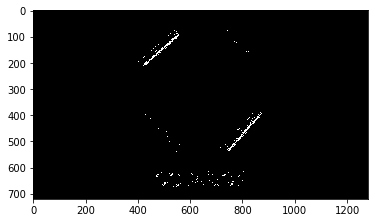

In [25]:
plt.imshow(filtered2,cmap="gray")
cv2.imshow('image',filtered2)
cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
smo_fil = cv2.GaussianBlur(filtered2,(5,5),0)

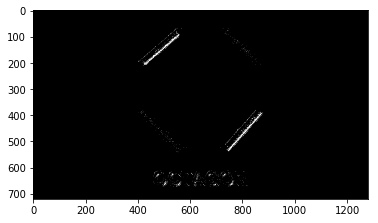

In [27]:
plt.imshow(smo_fil,cmap='gray')
plt.imsave('output_edge.png',smo_fil,cmap='gray')

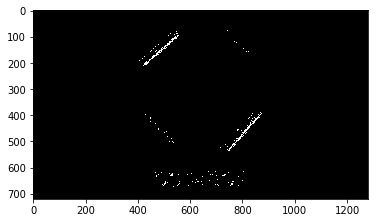

In [28]:
plt.imshow(filtered,cmap="gray")
cv2.imshow('image',filtered)
cv2.waitKey()
cv2.destroyAllWindows()

In [29]:
x = np.array([-1, +1, +1, -1])
y = np.array([-1, -1, +1, +1])

np.arctan2(y,x)*180/np.pi

array([-135.,  -45.,   45.,  135.])